# **Machine Learning CA2 : Overall Ratings and Salary Prediction of FIFA 22 Players**

## Name    : Immanuel Paul
## Class   : TYCS A
## Roll No : 8805




### **Dataset Selection : FIFA 22  & Importing Libraries**

In [1]:
import pandas as pd
df = pd.read_csv('/content/Fifa 2022 players.csv')
print(df)

       sofifa_id                                         player_url  \
0         158023  https://sofifa.com/player/158023/lionel-messi/...   
1         188545  https://sofifa.com/player/188545/robert-lewand...   
2          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3         190871  https://sofifa.com/player/190871/neymar-da-sil...   
4         192985  https://sofifa.com/player/192985/kevin-de-bruy...   
...          ...                                                ...   
19234     261962  https://sofifa.com/player/261962/defu-song/220002   
19235     262040  https://sofifa.com/player/262040/caoimhin-port...   
19236     262760  https://sofifa.com/player/262760/nathan-logue/...   
19237     262820  https://sofifa.com/player/262820/luke-rudden/2...   
19238     264540  https://sofifa.com/player/264540/emanuel-lalch...   

               short_name                            long_name  \
0                L. Messi       Lionel Andrés Messi Cuccittini   
1          R. L

<ipython-input-1-05e29b3e25d3>:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Fifa 2022 players.csv')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### **Data Exploration and Cleaning :**
### Functions for Data Cleaning

In [ ]:
#display top 5 rows of the dataset
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [ ]:
#Display Descriptive Summary of the dataset
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [ ]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [ ]:
df.dtypes

sofifa_id            int64
player_url          object
short_name          object
long_name           object
player_positions    object
                     ...  
player_face_url     object
club_logo_url       object
club_flag_url       object
nation_logo_url     object
nation_flag_url     object
Length: 110, dtype: object

In [ ]:
df.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

In [3]:
#Remove irrelevant columns from the dataset
useless_columns = ['player_url','long_name','dob','club_loaned_from','nation_position','nation_jersey_number','body_type','real_face','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url','player_tags','nation_team_id']
df = df.drop(useless_columns, axis=1)

In [ ]:
df.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,158023,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,188545,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,20801,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,190871,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,192985,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


### Data Visualization

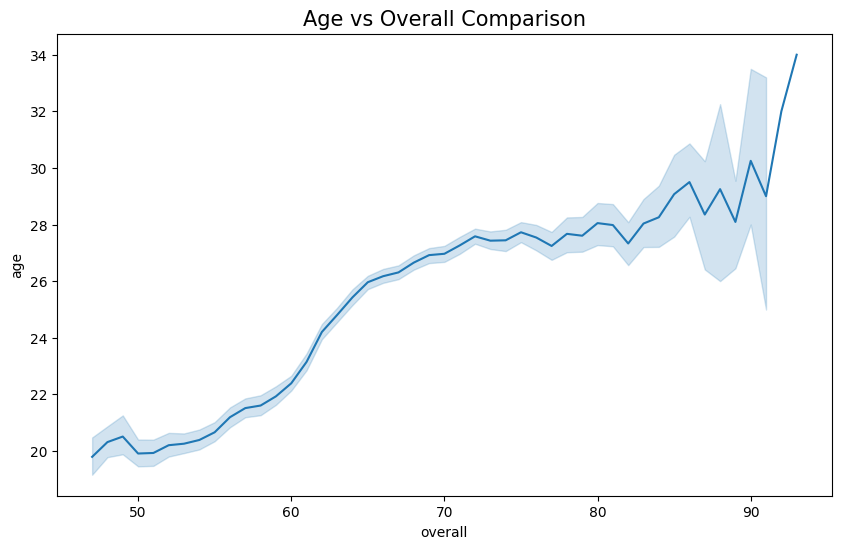

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x="overall", y="age", data=df)
plt.title("Age vs Overall Comparison", size=15)
plt.show()

As show in the above graph the there is a positive correlation between age and overall score. As the overall score increases from 50 to around 80, the age also increases steadily from 20 to approximately 28. Highest overall ratings is between the age of 34 and 35 while the lowest ratings is at the age of below 20.


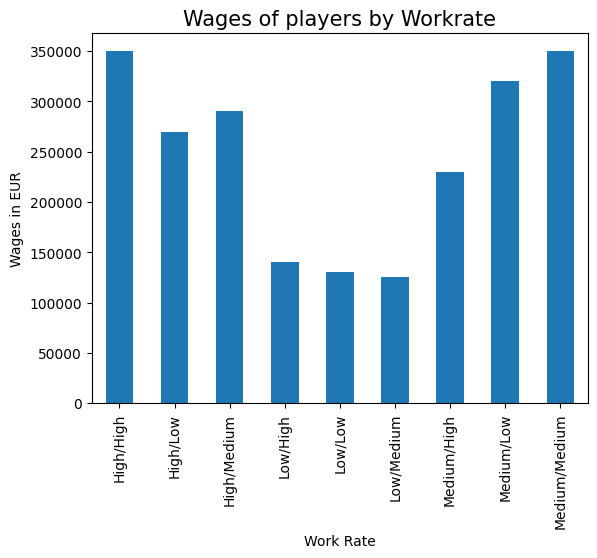

In [ ]:
df.groupby("work_rate")["wage_eur"].max().plot.bar()
plt.xlabel("Work Rate")
plt.ylabel("Wages in EUR")
plt.title("Wages of players by Workrate", fontsize = 15)
plt.show()

According to the graph Players with a High/High Work Rate have the highest salary followed by those with a Medium/Medium work rate. The Lowest Salary belongs to those who are having Low/Low, Low/Medium Work Rate

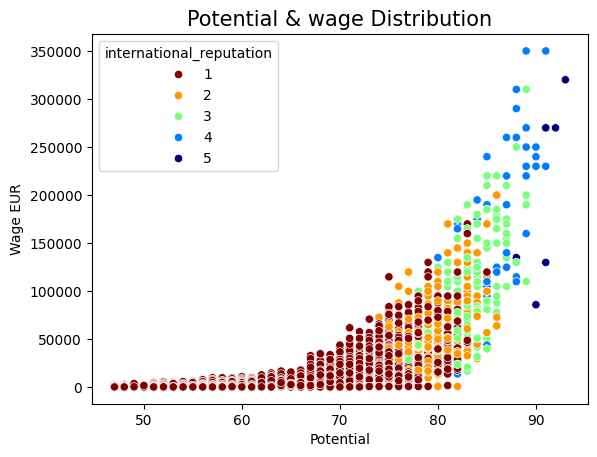

In [ ]:
sns.scatterplot(x =df['overall'], y = df['wage_eur'], hue = df['international_reputation'],palette='jet_r')
plt.xlabel("Potential")
plt.ylabel("Wage EUR")
plt.title("Potential & wage Distribution", fontsize = 15)
plt.show()

From the above graph Players with Higher International Reputation levels are Having with Higher Potential Ratings and Salary.

<ipython-input-8-fbba248d9c6c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x="international_reputation", y="value_eur", palette="tab10" )


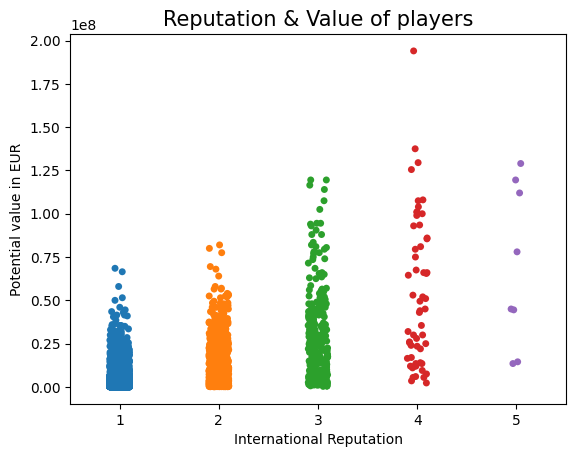

In [ ]:
sns.stripplot(data=df, x="international_reputation", y="value_eur", palette="tab10" )
plt.xlabel("International Reputation")
plt.ylabel("Potential value in EUR")
plt.title("Reputation & Value of players", fontsize = 15)
plt.show()

As expected, there seems to be a correlation between the reputation of players and their wages as the players with high reputational value tend to have higher potential values and earn more.

<ipython-input-191-ae2a7d1836aa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=y, y=x, palette = 'crest_r', orient='h')


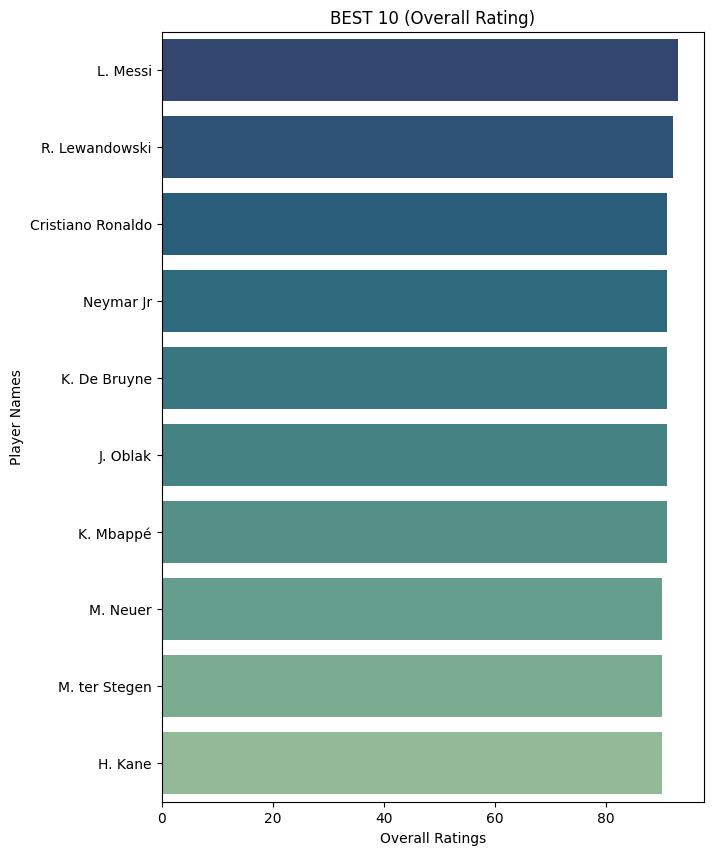

In [ ]:
#The Best 10 Players of FIFA 22 dataset
x = df['short_name'].head(10)
y = df['overall'].head(10)
# plot
plt.figure(figsize=(7,10))
ax= sns.barplot(x=y, y=x, palette = 'crest_r', orient='h')
plt.xticks()
plt.xlabel('Overall Ratings', size = 10)
plt.ylabel('Player Names', size = 10 )
plt.title('BEST 10 (Overall Rating)')
plt.show()

By looking at the graph, the Top 10 Players are - ten players, including L. Messi, R. Lewandowski, Cristiano Ronaldo, Neymar Jr., K. De Bruyne, J. Oblak, K. Mbappé, M. Neuer, M. ter Stegen, and H. Kane. Lionel Messi has the highest overall rating of 93. The Top 10 players have a rating between 90 to 93.

In [ ]:
player_name = df[['wage_eur','short_name',
                  'value_eur','overall','age',
                  'nationality_name','potential',
                  'international_reputation']].nlargest(10,['wage_eur']).set_index('short_name')
player_name

,wage_eur,value_eur,overall,age,nationality_name,potential,international_reputation
short_name,,,,,,,
K. De Bruyne,350000.0,125500000.0,91,30,Belgium,91,4
K. Benzema,350000.0,66000000.0,89,33,France,89,4
L. Messi,320000.0,78000000.0,93,34,Argentina,93,5
Casemiro,310000.0,88000000.0,89,29,Brazil,89,3
T. Kroos,310000.0,75000000.0,88,31,Germany,88,4
R. Sterling,290000.0,107500000.0,88,26,England,89,4
R. Lewandowski,270000.0,119500000.0,92,32,Poland,92,5
Cristiano Ronaldo,270000.0,45000000.0,91,36,Portugal,91,5
Neymar Jr,270000.0,129000000.0,91,29,Brazil,91,5


Here, the top 10 players of FIFA 22 having High International reputation are having the highest salary.

### **Random Forest Classfier**

In [19]:
columns_to_drop = ['short_name', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'club_name', 'league_name', 'club_position', 'nationality_name', 'preferred_foot', 'work_rate', 'player_traits', 'club_joined']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

In [4]:
useless_cols = ['physic', 'sofifa_id', 'player_positions']
df = df.drop(useless_cols, axis=1)

In [26]:
df['overall_category'] = df['overall'].apply(lambda x: 'High' if x >= 70 else 'Low')

In [27]:
X = df.drop(['overall', 'overall_category'], axis=1)
y = df['overall_category']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X = X.dropna()

In [25]:
df = df.fillna(0)

In [29]:
clf_model = RandomForestClassifier(n_estimators=100, random_state=42)
clf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
y_pred = clf_model.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [32]:
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9831081081081081
              precision    recall  f1-score   support

        High       0.97      0.97      0.97      1083
         Low       0.99      0.99      0.99      2765

    accuracy                           0.98      3848
   macro avg       0.98      0.98      0.98      3848
weighted avg       0.98      0.98      0.98      3848



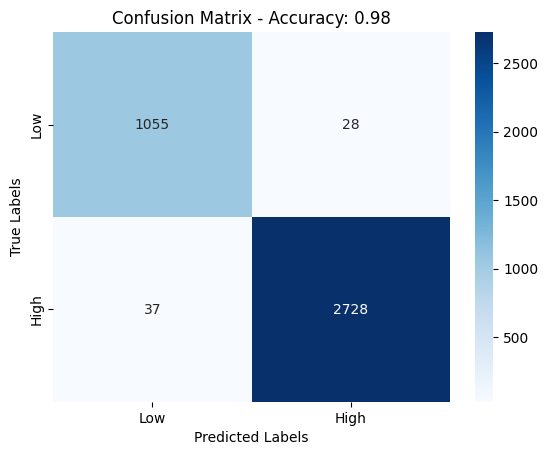

In [33]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix - Accuracy: {accuracy:.2f}')
plt.show()

### **Data Transformation**

In [ ]:
from sklearn.preprocessing import StandardScaler
# Label encoding for categorical features
le = LabelEncoder()
categorical_features = ['preferred_foot', 'work_rate']
df[categorical_features] = df[categorical_features].apply(le.fit_transform)

In [ ]:
# Data Transformation
scaler = StandardScaler()
numerical_features = ['overall', 'potential', 'value_eur', 'wage_eur', 'age']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print(df)

                                              player_url          short_name  \
0      https://sofifa.com/player/158023/lionel-messi/...            L. Messi   
1      https://sofifa.com/player/188545/robert-lewand...      R. Lewandowski   
2      https://sofifa.com/player/20801/c-ronaldo-dos-...   Cristiano Ronaldo   
3      https://sofifa.com/player/190871/neymar-da-sil...           Neymar Jr   
4      https://sofifa.com/player/192985/kevin-de-bruy...        K. De Bruyne   
...                                                  ...                 ...   
19234  https://sofifa.com/player/261962/defu-song/220002           Song Defu   
19235  https://sofifa.com/player/262040/caoimhin-port...           C. Porter   
19236  https://sofifa.com/player/262760/nathan-logue/...            N. Logue   
19237  https://sofifa.com/player/262820/luke-rudden/2...           L. Rudden   
19238  https://sofifa.com/player/264540/emanuel-lalch...  E. Lalchhanchhuaha   

                                 long_n

In [ ]:
X = X.dropna()

In [ ]:
df = df.fillna(0)

### **Algorithm Selection: Random Forest Regression**
### **Data Splitting**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(['overall'], axis=1)
y = df['overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(15391, 59)

In [ ]:
X_test.shape

(3848, 59)

In [12]:
#drop categorical variables
unwanted_columns = ['short_name', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb','lcb', 'cb', 'rcb', 'rb', 'gk', 'club_name','league_name','club_position','nationality_name', 'preferred_foot', 'work_rate', 'player_traits', 'club_joined']
X_train = X_train.drop(unwanted_columns, axis=1)
X_test = X_test.drop(unwanted_columns, axis=1)

### **Model Building**

In [ ]:
# Train a RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

### **Prediction And Model Evaluation**

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.004818181094148991


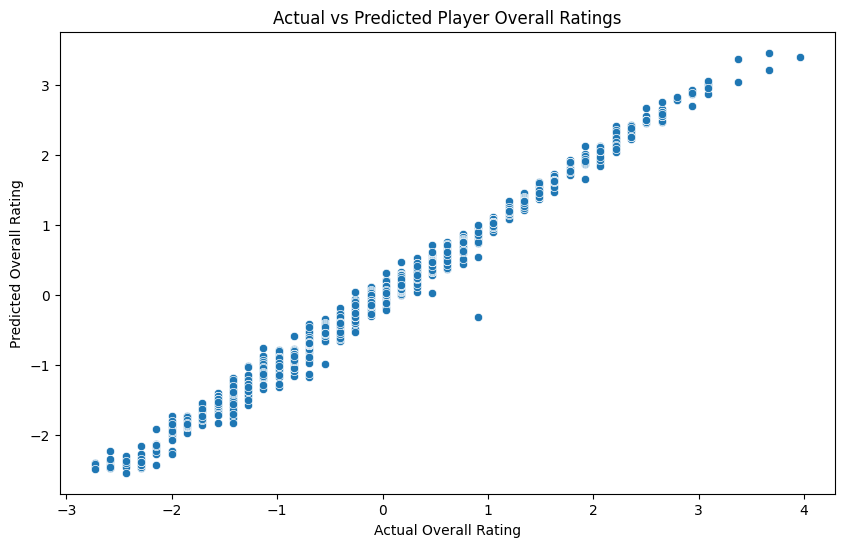

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Overall Rating')
plt.ylabel('Predicted Overall Rating')
plt.title('Actual vs Predicted Player Overall Ratings')
plt.show()

The scatter plot comparing the actual overall rating of players to their predicted overall rating can be used to evaluate the performance of player. The data points are closely aligned along a diagonal line, indicating that there is a strong correlation between the actual and predicted ratings.

### Drop Unwanted Columns

In [ ]:
columns_to_drop = ['short_name', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'club_name', 'league_name', 'club_position', 'nationality_name', 'preferred_foot', 'work_rate', 'player_traits', 'club_joined']

# Drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

In [ ]:
X = X.dropna()

In [ ]:
df = df.fillna(0)

### **Salary Prediction using Random Forest Regression**

Mean Squared Error: 0.2084815153162746
                 Feature  Importance
0                overall    0.581449
2              value_eur    0.186729
7     release_clause_eur    0.025676
13    skill_ball_control    0.018411
15      power_shot_power    0.016090
5              weight_kg    0.013350
3                    age    0.013250
12             defending    0.012787
18  goalkeeping_handling    0.012350
4              height_cm    0.010722


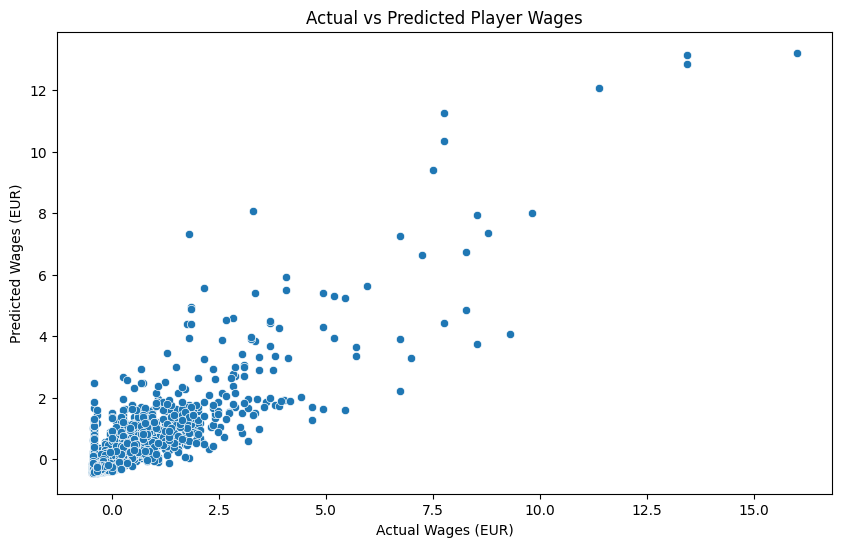

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a pandas DataFrame with the provided attributes
# df = pd.read_csv('your_dataset.csv')

# Drop any rows with missing values for simplicity
df.dropna(inplace=True)

# Let's use 'wage_eur' as the target variable for regression
X = df.drop(['wage_eur'], axis=1)
y = df['wage_eur']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the dataset using RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# To Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature Importance
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 important features
top_features = feature_importance_df.head(10)
print(top_features)

# Plotting the predicted vs actual wages
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Wages (EUR)')
plt.ylabel('Predicted Wages (EUR)')
plt.title('Actual vs Predicted Player Wages')
plt.show()

## **Conclusion**
The confusion matrix provides a comprehensive overview of the classification model's performance. With an accuracy of 98%, the model demonstrates high precision and recall for both 'High' and 'Low' overall rating categories. It correctly identifies 1055 instances of 'Low' rating and 2728 instances of 'High' rating, with only 28 instances misclassified as 'High' and 37 as 'Low'. The precision, recall, and F1-score metrics further emphasize the model's strong performance, achieving 97% precision and recall for 'High' and 99% for 'Low'.

The scatter plot depicting the correlation between actual and predicted player overall ratings affirms the model's accuracy. A strong alignment along the diagonal line indicates that the model accurately predicts overall ratings.

The presence of a large cluster near the origin (0,0) suggests there is a concentration of players with low actual and predicted ratings. As actual wages increase (moving right along the x-axis), the spread of predicted wages becomes more dispersed along the y-axis. Hence, there is more variance in the predicted wages, with some overestimations and underestimations visible.


A large number is visible at the lower left corner, indicating many players with low actual and predicted wages. As we move right along the x-axis, there are fewer dots, showing that fewer players have higher actual wages. The prediction model has some level of inconsistency as the spread of predicted values increases with higher actual values.